# Parsing Grover files from QPU

In [1]:
# enable importing from parent directory:
import sys
sys.path.insert(0, '..\\')

import numpy as np
from numpy import array
import sys
import matplotlib.pyplot as plt
from utils2 import *

In [2]:
qvm_time_c = []
qvm_time_s = []
qvm_accuracy_c = []
qvm_accuracy_s = []
qvm_loss_c = []
qvm_loss_s = []

qpu_time_c = []
qpu_time_s = []
qpu_accuracy_c = []
qpu_accuracy_s = []
qpu_loss_c = []
qpu_loss_s = []

In [3]:
# reset values before next analysis
def clear_vars():
    global all_results; all_results = None
    global results_raws; results_raws = []
    global results; results = None
    global times; times = []
    global acc_; acc_ = None
    global time_; time_ = None
    global expected; expected = None
    
# print accuracies:
def print_accuracy(results, should_be=None):
    correct = 0
    if should_be is not None:
        for i in results:
            if np.all(i == should_be):
                correct += 1
    accuracy = correct/len(results) * 100
    print('Accuracy: {}/{} = {}%'.format(correct, len(results), accuracy))
    
    # determine most 'prominent' answer:
    unq_rows, count = np.unique(results, axis=0, return_counts=1)
    print('Most prominent: {}'.format(unq_rows[np.argmax(count)]))
    
    # calculate loss
    differences = 0
    for row in results:
        # print('{} - {} = {}'.format(row, should_be, np.abs(row - should_be)))
        differences = differences + np.sum(np.abs(row - should_be))
    loss = differences / (len(results) * len(results[0])) * 100
    return accuracy, loss

## n = 2

In [4]:
n = 2

### QVM Results

##### Complex

In [5]:
clear_vars()

In [6]:
results_raws = [
    {0: array([0, 0, 0, 0]), 1: array([0, 0, 0, 0]), 2: array([0, 0, 0, 0]), 6: array([0, 0, 0, 0]), 7: array([0, 0, 0, 0]), 10: array([0, 0, 0, 0]), 11: array([0, 0, 0, 0]), 13: array([0, 0, 0, 0]), 14: array([0, 0, 0, 0]), 15: array([0, 0, 0, 0]), 16: array([0, 0, 0, 0]), 17: array([0, 0, 0, 0])},
]

times = [0.11325593999936245]

expected = [0 for i in range(n)]

In [7]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0]
 [0 0]
 [0 0]
 [0 0]]


In [8]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 4/4 = 100.0%
Most prominent: [0 0]


In [9]:
time_ = np.average(np.array(times))

In [10]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 100.0%, Time: 0.11325593999936245


##### Simple

In [11]:
clear_vars()

In [12]:
results_raws = [
    {0: array([1, 1, 1, 1]), 1: array([1, 1, 1, 1]), 2: array([0, 0, 0, 0]), 6: array([0, 0, 0, 0]), 7: array([0, 0, 0, 0]), 10: array([0, 0, 0, 0]), 11: array([0, 0, 0, 0]), 13: array([0, 0, 0, 0]), 14: array([0, 0, 0, 0]), 15: array([0, 0, 0, 0]), 16: array([0, 0, 0, 0]), 17: array([0, 0, 0, 0])},
]

times = [0.06957769399741665]

expected = [1 for i in range(n)]

In [13]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1]
 [1 1]
 [1 1]
 [1 1]]


In [14]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 4/4 = 100.0%
Most prominent: [1 1]


In [15]:
time_ = np.average(np.array(times))

In [16]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 100.0%, Time: 0.06957769399741665


### QPU Results

##### Complex

In [17]:
clear_vars()

In [18]:
results_raws = [
    {0: array([1, 0, 0, 0]), 1: array([0, 0, 0, 0]), 2: array([0, 0, 0, 0]), 6: array([0, 1, 0, 0]), 7: array([0, 0, 0, 0]), 10: array([0, 0, 0, 0]), 11: array([0, 0, 0, 0]), 13: array([0, 0, 0, 0]), 14: array([0, 0, 0, 0]), 15: array([0, 0, 0, 0]), 16: array([0, 0, 0, 0]), 17: array([0, 0, 0, 0])},
    {0: array([0, 0, 0, 0, 0, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 1, 0, 1, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 1, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0])},
]

times = [0.18015958700561896, 0.1859017499955371]

expected = [0 for i in range(n)]

In [19]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [20]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 11/12 = 91.66666666666666%
Most prominent: [0 0]


In [21]:
time_ = np.average(np.array(times))

In [22]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 91.66666666666666%, Time: 0.18303066850057803


##### Simple

In [23]:
clear_vars()

In [24]:
results_raws = [
    {0: array([1, 1, 0, 1]), 1: array([1, 1, 0, 0]), 2: array([0, 0, 0, 0]), 6: array([0, 0, 0, 0]), 7: array([0, 0, 0, 0]), 10: array([0, 0, 0, 0]), 11: array([0, 0, 0, 1]), 13: array([0, 0, 0, 0]), 14: array([0, 0, 0, 0]), 15: array([0, 0, 0, 0]), 16: array([0, 0, 0, 0]), 17: array([0, 0, 0, 0])},
    {0: array([1, 1, 0, 0, 1, 1, 1, 0]), 1: array([1, 1, 1, 1, 1, 1, 0, 1]), 2: array([0, 0, 0, 0, 0, 0, 0, 0]), 6: array([0, 0, 1, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 1]), 16: array([0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0])},
]

times = [0.18015958700561896, 0.1859017499955371]

expected = [1 for i in range(n)]

In [25]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]]


In [26]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 6/12 = 50.0%
Most prominent: [1 1]


In [27]:
time_ = np.average(np.array(times))

In [28]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 50.0%, Time: 0.18303066850057803


## n = 3

In [29]:
n = 3

### QVM Results

##### Complex

In [30]:
clear_vars()

In [31]:
results_raws = [
    {0: array([0, 0, 1, 0, 1, 0, 0, 0]), 1: array([0, 0, 0, 0, 0, 1, 0, 0]), 2: array([0, 0, 1, 0, 0, 1, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.5293448120064568]

expected = [0 for i in range(n)]

In [32]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0]
 [0 0 0]
 [1 0 1]
 [0 0 0]
 [1 0 0]
 [0 1 1]
 [0 0 0]
 [0 0 0]]


In [33]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 5/8 = 62.5%
Most prominent: [0 0 0]


In [34]:
time_ = np.average(np.array(times))

In [35]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 62.5%, Time: 0.5293448120064568


##### Simple

In [36]:
clear_vars()

In [37]:
results_raws = [
    {0: array([0, 1, 1, 1, 1, 1, 1, 1]), 1: array([1, 1, 1, 1, 1, 1, 1, 1]), 2: array([0, 1, 1, 1, 1, 1, 1, 1]), 6: array([0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.5339282870118041]

expected = [1 for i in range(n)]

In [38]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [39]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 7/8 = 87.5%
Most prominent: [1 1 1]


In [40]:
time_ = np.average(np.array(times))

In [41]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 87.5%, Time: 0.5339282870118041


### QPU Results

##### Complex

In [42]:
clear_vars()

In [43]:
results_raws = [
    {0: array([0, 0, 1, 1, 1, 0, 1, 1]), 1: array([0, 0, 1, 0, 1, 0, 0, 0]), 2: array([0, 1, 1, 0, 1, 1, 1, 0]), 6: array([0, 0, 1, 0, 0, 0, 1, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 1]), 10: array([0, 1, 0, 0, 0, 1, 0, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 1, 1, 1, 1, 0, 1, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]), 1: array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]), 2: array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]), 10: array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.4823024829966016, 0.5027842469862662]

expected = [0 for i in range(n)]

In [44]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 1]
 [1 0 1]
 [1 0 0]
 [1 1 0]
 [0 0 0]
 [1 1 1]
 [1 0 1]
 [0 0 1]
 [1 0 1]
 [0 0 0]
 [1 0 1]
 [0 1 1]
 [0 0 0]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 0]
 [0 1 0]
 [0 1 1]]


In [45]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 5/24 = 20.833333333333336%
Most prominent: [0 0 0]


In [46]:
time_ = np.average(np.array(times))

In [47]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 20.833333333333336%, Time: 0.4925433649914339


##### Simple

In [48]:
clear_vars()

In [49]:
results_raws = [
    {0: array([0, 1, 0, 0, 0, 0, 1, 0]), 1: array([1, 0, 1, 0, 1, 1, 0, 1]), 2: array([1, 0, 0, 0, 0, 1, 0, 1]), 6: array([1, 0, 0, 1, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 1, 1, 1, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 1, 1, 0, 1, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]), 1: array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]), 2: array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]), 6: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]), 15: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [0.49739786999998614, 0.4745767840067856]

expected = [1 for i in range(n)]

In [50]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 1 1]
 [1 0 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 1]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]]


In [51]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 1/24 = 4.166666666666666%
Most prominent: [1 0 0]


In [52]:
time_ = np.average(np.array(times))

In [53]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 4.166666666666666%, Time: 0.48598732700338587


## n = 4

In [54]:
n = 4

### QVM Results

##### Complex

In [55]:
clear_vars()

In [56]:
results_raws = [
    {0: array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 1: array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]), 2: array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]), 6: array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [2.0275902900029905]

expected = [0 for i in range(n)]

In [57]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 1 1 1]
 [1 1 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 1]
 [0 0 0 0]
 [0 0 0 0]]


In [58]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 8/16 = 50.0%
Most prominent: [0 0 0 0]


In [59]:
time_ = np.average(np.array(times))

In [60]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 50.0%, Time: 2.0275902900029905


##### Simple

In [61]:
clear_vars()

In [62]:
results_raws = [
    {0: array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]), 1: array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]), 2: array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]), 6: array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [2.02465744302026]

expected = [1 for i in range(n)]

In [63]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [0 1 0 0]
 [1 1 1 1]
 [0 0 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [0 0 1 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 1 1]
 [0 0 0 0]]


In [64]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 9/16 = 56.25%
Most prominent: [1 1 1 1]


In [65]:
time_ = np.average(np.array(times))

In [66]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 56.25%, Time: 2.02465744302026


### QPU Results

##### Complex

In [67]:
clear_vars()

In [68]:
results_raws = [
    {0: array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]), 1: array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]), 2: array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]), 6: array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])},
    {0: array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]), 1: array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]), 2: array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]), 6: array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1]), 7: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 10: array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]), 15: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])}
]

times = [1.216452485008631, 1.2442219399963506]

expected = [0 for i in range(n)]

In [69]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 0 0 1]
 [0 0 1 1]
 [1 0 0 1]
 [1 0 0 0]
 [0 0 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 0 0 0]
 [1 1 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 0 1 1]
 [1 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 1 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 1 0]
 [0 1 1 1]
 [1 0 0 1]
 [1 1 0 1]
 [1 1 0 1]
 [1 0 1 0]
 [1 1 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 1 1]
 [0 1 0 1]
 [0 0 1 0]
 [1 0 0 1]]


In [70]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 1/32 = 3.125%
Most prominent: [1 0 0 0]


In [71]:
time_ = np.average(np.array(times))

In [72]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 3.125%, Time: 1.2303372125024907


##### Simple

In [73]:
clear_vars()

In [74]:
results_raws = [
    {0: array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]), 1: array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0]), 2: array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]), 6: array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]), 7: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 10: array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])}
]

times = [1.22128239198355]

expected = [1 for i in range(n)]

In [75]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 0 1 1]
 [1 1 1 0]
 [1 1 0 1]
 [0 0 1 0]
 [0 1 0 1]
 [1 1 0 0]
 [0 1 0 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [1 1 0 0]
 [1 1 1 1]
 [0 0 1 1]
 [1 1 0 1]
 [1 0 0 1]]


In [76]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 1/16 = 6.25%
Most prominent: [0 0 1 0]


In [77]:
time_ = np.average(np.array(times))

In [78]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 6.25%, Time: 1.22128239198355


## n = 5

In [79]:
n = 5

### QVM Results

##### Complex

In [80]:
clear_vars()

In [81]:
results_raws = [
    {0: array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0]), 1: array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0]), 6: array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0]), 7: array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [8.024815768003464]

expected = [0 for i in range(n)]

In [82]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[0 1 0 0 1]
 [0 1 0 1 1]
 [0 0 0 0 0]
 [1 0 0 1 1]
 [0 0 0 0 0]
 [0 1 1 0 0]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [0 0 0 0 0]
 [1 1 0 0 1]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 1 1 0]
 [0 0 1 1 1]
 [0 1 0 0 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 0 1 0]
 [0 0 0 0 0]
 [1 1 1 1 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [83]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 11/32 = 34.375%
Most prominent: [0 0 0 0 0]


In [84]:
time_ = np.average(np.array(times))

In [85]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 34.375%, Time: 8.024815768003464


##### Simple

In [86]:
clear_vars()

In [87]:
results_raws = [
    {0: array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0]), 1: array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1]), 2: array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1]), 6: array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0]), 7: array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0]), 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [8.036032825999428]

expected = [1 for i in range(n)]

In [88]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 1 1]
 [1 1 0 1 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [0 0 0 0 0]
 [1 0 1 0 1]
 [1 1 1 1 1]
 [0 1 0 0 1]
 [0 0 0 1 1]
 [1 1 1 1 1]
 [1 1 1 1 0]
 [0 1 1 0 1]
 [0 1 1 0 1]
 [1 1 1 1 1]
 [1 0 1 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 0 0 1]
 [0 0 0 1 0]
 [0 1 1 1 1]
 [0 1 1 0 0]]


In [89]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 12/32 = 37.5%
Most prominent: [1 1 1 1 1]


In [90]:
time_ = np.average(np.array(times))

In [91]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 37.5%, Time: 8.036032825999428


### QPU Results

##### Complex

In [92]:
clear_vars()

In [93]:
results_raws = [
    {0: array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1]), 1: array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1]), 2: array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0]), 6: array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1]), 7: array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1]), 10: array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1]), 11: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 14: array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1]), 15: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1])},
    {0: array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1]), 1: array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0]), 2: array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0]), 6: array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1]), 7: array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1]), 10: array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [3.5149570959620178, 3.4865376070374623]

expected = [0 for i in range(n)]

In [94]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 0 1 1 0]
 [1 0 0 1 0]
 [1 1 0 0 1]
 [0 0 0 1 1]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 1 1 1]
 [0 0 1 0 1]
 [0 1 1 1 0]
 [0 1 1 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 1 1]
 [0 1 0 1 1]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 1 1 0 1]
 [0 1 0 1 1]
 [0 1 1 1 0]
 [0 1 0 1 0]
 [1 0 0 1 1]
 [1 0 1 0 1]
 [1 0 1 1 1]
 [0 0 0 1 1]
 [0 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 1 1]
 [1 0 0 1 1]
 [0 0 0 0 1]
 [1 1 0 1 1]
 [0 1 1 1 0]
 [0 1 0 1 1]
 [0 0 0 1 1]
 [1 0 1 1 1]
 [0 0 0 1 1]
 [1 1 0 1 0]
 [1 0 0 0 0]
 [0 1 0 1 1]
 [0 0 0 0 1]
 [1 0 0 1 0]
 [1 1 0 0 1]
 [1 1 0 1 0]
 [1 1 1 0 1]
 [1 0 1 0 1]
 [0 1 0 1 1]
 [0 1 0 1 0]
 [0 0 0 0 0]
 [1 0 1 1 1]
 [1 0 0 1 0]
 [1 0 0 1 1]
 [0 0 1 1 0]
 [1 0 0 1 1]
 [0 1 0 0 0]
 [1 1 1 0 1]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 1]
 [0 1 0 1 0]
 [1 1 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [1 0 0 1 1]]


In [95]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 2/64 = 3.125%
Most prominent: [0 1 0 1 1]


In [96]:
time_ = np.average(np.array(times))

In [97]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 3.125%, Time: 3.50074735149974


##### Simple

In [98]:
clear_vars()

In [99]:
results_raws = [
    {0: array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1]), 1: array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0]), 2: array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0]), 6: array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1]), 7: array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1]), 10: array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1]), 15: array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [3.5772449980140664]

expected = [1 for i in range(n)]

In [100]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 0 0 1 1]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 0 1 1 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 1 1 0 0]
 [1 1 0 0 1]
 [1 1 0 1 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 1 1 0 1]
 [0 0 1 1 1]
 [1 0 0 1 0]
 [1 0 1 0 1]
 [1 0 0 0 1]
 [1 0 1 0 1]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 1 1 1]
 [0 1 0 0 1]
 [0 1 0 1 0]
 [1 1 0 0 1]
 [0 0 0 1 1]
 [1 1 0 0 0]
 [1 0 1 0 1]
 [0 0 0 1 1]
 [1 0 1 1 1]
 [0 0 0 0 1]
 [0 0 1 1 1]
 [1 1 0 0 1]
 [1 0 0 1 1]]


In [101]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 0/32 = 0.0%
Most prominent: [0 0 0 0 1]


In [102]:
time_ = np.average(np.array(times))

In [103]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 0.0%, Time: 3.5772449980140664


## n = 6

In [104]:
n = 6

### QVM Results

##### Complex

In [105]:
clear_vars()

In [106]:
results_raws = [
    {0: array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]), 1: array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]), 2: array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]), 6: array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]), 7: array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]), 10: array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), 17: array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])}
]

times = [8.372382586996537]

expected = [0 for i in range(n)]

In [107]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 0 1 1 1]
 [0 0 1 1 0 0]
 [1 1 1 1 0 0]
 [0 0 0 1 1 0]
 [0 1 0 0 1 0]
 [0 1 0 1 0 1]
 [1 0 1 0 1 0]
 [0 1 1 1 1 1]
 [1 1 0 0 1 1]
 [1 0 0 1 0 1]
 [1 0 1 1 0 1]
 [0 0 1 1 1 0]
 [0 1 1 0 1 1]
 [0 1 1 1 0 1]
 [1 0 0 0 0 0]
 [0 1 1 1 0 0]
 [1 1 1 0 1 0]
 [1 1 1 0 1 1]
 [1 1 0 0 1 1]
 [1 1 1 1 0 1]
 [1 1 0 0 0 1]
 [1 1 0 1 1 0]
 [0 0 1 0 1 0]
 [1 0 0 1 1 1]
 [0 1 1 0 0 1]
 [1 0 1 0 1 1]
 [1 0 0 1 0 1]
 [1 0 1 1 1 0]
 [0 0 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 0 1 1 0]
 [0 0 1 1 1 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 1 0 1 1]
 [1 1 0 1 0 1]
 [1 1 0 1 1 1]
 [1 0 1 0 0 1]
 [0 0 0 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 0 0 0 0 1]
 [0 0 0 1 0 1]
 [1 0 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 0 0 0]
 [1 0 1 0 0 1]
 [1 1 0 0 0 0]
 [1 0 1 1 1 0]
 [1 0 1 0 0 0]
 [1 1 1 1 0 1]
 [0 1 1 1 1 1]
 [0 1 1 1 1 1]
 [0 0 1 0 0 1]
 [1 1 1 0 0 0]
 [0 1 0 1 1 1]
 [1 1 1 1 1 1]
 [1 0 0 1 1 1]
 [0 0 1 1 1 0]
 [0 1 0 1 1 1]
 [1 0 1 1 0 0]]


In [108]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 0/64 = 0.0%
Most prominent: [0 1 1 1 1 1]


In [109]:
time_ = np.average(np.array(times))

In [110]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_c.append(acc_)
qvm_time_c.append(time_)
qvm_loss_c.append(loss_)

Accuracy: 0.0%, Time: 8.372382586996537


##### Simple

In [111]:
clear_vars()

In [112]:
results_raws = [
    {0: array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]), 1: array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]), 2: array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]), 6: array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 7: array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]), 10: array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
]

times = [29.911805313982768]

expected = [1 for i in range(n)]

In [113]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 1 0 0 1]
 [1 0 0 1 1 1]
 [1 1 1 1 0 1]
 [0 0 1 1 1 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 1 1 1 0 1]
 [0 1 0 1 0 0]
 [0 1 0 1 0 1]
 [0 0 0 1 0 0]
 [0 1 1 0 1 0]
 [1 0 0 0 0 1]
 [1 1 0 1 1 0]
 [1 1 0 0 0 1]
 [1 0 1 1 1 0]
 [1 1 0 0 0 0]
 [1 1 0 1 1 1]
 [0 1 1 0 0 0]
 [0 1 0 1 1 0]
 [0 0 1 1 0 0]
 [1 1 0 0 1 1]
 [1 1 0 0 0 1]
 [1 1 1 1 1 1]
 [1 0 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 0 1 1]
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [1 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 1 0 0 1 1]
 [0 0 1 0 0 1]
 [0 1 1 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 0 0]
 [0 1 0 1 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 1 0 1 0 0]
 [0 0 1 1 1 1]
 [0 1 0 0 1 1]
 [0 1 0 1 0 1]
 [0 0 0 1 0 1]
 [1 1 1 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 1 0 1]
 [1 0 1 1 1 1]
 [1 1 1 1 1 1]
 [0 1 0 0 0 1]
 [1 0 1 1 1 1]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [1 0 1 0 1 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 0 1 1]
 [0 1 1 0 1 1]
 [1 1 1 0 0 0]
 [0 0 1 0 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 1 1]]


In [114]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 4/64 = 6.25%
Most prominent: [1 1 1 1 1 1]


In [115]:
time_ = np.average(np.array(times))

In [116]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qvm_accuracy_s.append(acc_)
qvm_time_s.append(time_)
qvm_loss_s.append(loss_)

Accuracy: 6.25%, Time: 29.911805313982768


### QPU Results

##### Complex

In [117]:
clear_vars()

In [118]:
results_raws = [
    {0: array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]), 1: array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]), 2: array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1]), 6: array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]), 7: array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]), 10: array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])}
]

times = [8.192719826998655]

expected = [0 for i in range(n)]

In [119]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 1 0 1 1 1]
 [1 1 0 1 0 1]
 [0 1 1 0 1 1]
 [1 0 1 1 0 0]
 [1 1 0 1 0 1]
 [0 0 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [1 0 1 1 1 1]
 [1 0 0 1 1 1]
 [0 1 1 1 1 1]
 [0 0 1 0 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 1 0]
 [1 1 0 0 0 1]
 [0 1 1 1 1 0]
 [1 1 1 0 1 1]
 [1 1 1 1 1 0]
 [1 1 0 1 1 0]
 [1 1 0 0 0 1]
 [0 1 1 0 1 1]
 [1 0 1 1 1 0]
 [0 0 1 1 1 1]
 [1 0 1 1 0 0]
 [1 0 1 0 0 0]
 [1 0 0 1 1 0]
 [0 0 1 0 0 1]
 [1 1 0 1 0 0]
 [1 1 0 0 1 1]
 [1 0 1 1 0 1]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 1 1 0 1]
 [0 0 0 0 0 1]
 [0 0 1 0 0 1]
 [1 0 1 1 1 0]
 [0 0 1 1 1 0]
 [1 1 0 0 1 1]
 [1 1 0 1 1 0]
 [1 1 0 0 1 1]
 [1 1 0 0 0 1]
 [0 1 0 1 0 0]
 [0 1 1 0 1 0]
 [0 1 1 0 0 0]
 [1 0 0 0 0 1]
 [1 0 1 1 0 0]
 [1 0 0 0 1 0]
 [1 0 1 0 1 0]
 [1 1 1 1 0 0]
 [1 0 1 1 1 0]
 [0 0 0 1 1 0]
 [1 0 1 0 1 1]
 [0 1 1 1 0 0]
 [1 0 1 0 0 1]
 [0 0 0 0 0 0]
 [1 1 0 0 0 1]
 [0 1 1 1 0 1]
 [1 1 1 0 0 1]
 [1 0 0 1 1 0]
 [0 0 1 0 1 1]
 [0 1 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 1 0 0]
 [1 0 1 1 1 1]]


In [120]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 1/64 = 1.5625%
Most prominent: [1 1 0 0 0 1]


In [121]:
time_ = np.average(np.array(times))

In [122]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_c.append(acc_)
qpu_time_c.append(time_)
qpu_loss_c.append(loss_)

Accuracy: 1.5625%, Time: 8.192719826998655


##### Simple

In [123]:
clear_vars()

In [124]:
results_raws = [
    {0: array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]), 1: array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]), 2: array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 6: array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]), 7: array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]), 10: array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]), 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 14: array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]), 15: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 16: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 17: array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])}
]

times = [7.992328174004797]

expected = [1 for i in range(n)]

In [125]:
all_results = None

for results_raw in results_raws:
    results = getResultsArray(n=n, resultsDict=results_raw, Aspen12Q=True)
    
    if all_results is None:
        all_results = results
    else:
        all_results = np.concatenate((all_results, results), axis=0)
        
print(all_results)

[[1 0 0 1 0 0]
 [0 1 1 0 1 1]
 [1 1 0 1 0 1]
 [1 1 1 1 0 1]
 [1 0 0 1 0 1]
 [1 1 1 0 1 1]
 [0 0 0 1 1 0]
 [1 0 0 0 1 1]
 [1 1 1 1 0 1]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [1 1 0 1 0 1]
 [0 0 0 0 1 1]
 [0 1 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 1 1 0 1]
 [0 0 0 0 1 0]
 [1 0 0 1 1 1]
 [1 0 0 1 1 1]
 [1 1 0 1 1 0]
 [0 0 0 1 0 0]
 [1 1 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 0 0 0 1]
 [1 1 1 0 0 0]
 [0 0 0 0 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [0 1 0 1 1 0]
 [1 1 0 0 0 0]
 [0 0 0 1 1 0]
 [1 0 0 0 0 0]
 [0 1 1 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 1 1 1]
 [0 0 1 1 1 0]
 [0 0 1 1 1 0]
 [1 0 1 1 1 0]
 [1 1 0 0 0 0]
 [0 0 1 1 0 1]
 [1 1 1 1 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 1 1 1 1]
 [1 0 0 0 1 1]
 [0 0 1 0 1 0]
 [1 1 0 0 0 0]
 [0 1 0 1 1 1]
 [0 1 0 1 0 1]
 [0 0 0 1 0 1]
 [0 0 0 1 0 0]
 [0 0 1 1 1 1]
 [0 0 0 1 1 1]
 [1 1 0 1 0 1]
 [0 0 0 1 0 1]
 [0 1 0 1 0 0]
 [0 0 0 0 1 0]
 [1 1 0 1 1 1]
 [1 1 0 1 0 0]
 [0 1 1 1 0 0]
 [0 1 0 1 0 0]]


In [126]:
acc_, loss_ = print_accuracy(all_results, should_be=expected)

Accuracy: 0/64 = 0.0%
Most prominent: [0 0 0 0 1 0]


In [127]:
time_ = np.average(np.array(times))

In [128]:
print('Accuracy: {}%, Time: {}'.format(acc_, time_))
qpu_accuracy_s.append(acc_)
qpu_time_s.append(time_)
qpu_loss_s.append(loss_)

Accuracy: 0.0%, Time: 7.992328174004797


## Plot the times and accuracies

### Times

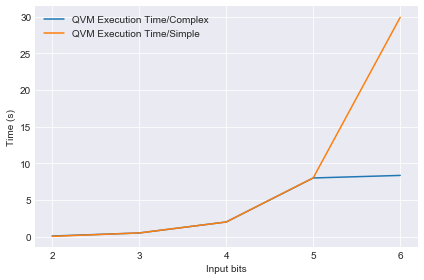

In [129]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_time_c, label='QVM Execution Time/Complex')
plt.plot(x, qvm_time_s, label='QVM Execution Time/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('grover_qvm_exec_time')
plt.show()

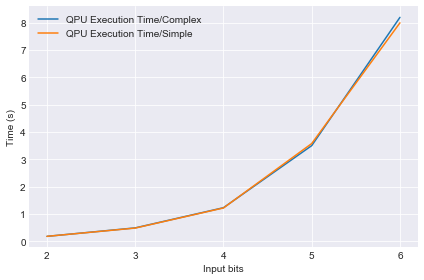

In [130]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qpu_time_c, label='QPU Execution Time/Complex')
plt.plot(x, qpu_time_s, label='QPU Execution Time/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('grover_qpu_exec_time')
plt.show()

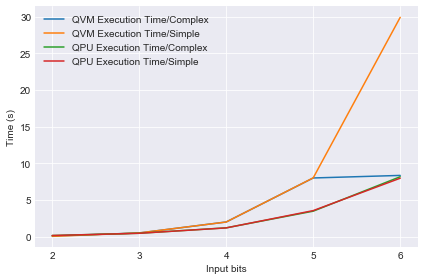

In [131]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_time_c, label='QVM Execution Time/Complex')
plt.plot(x, qvm_time_s, label='QVM Execution Time/Simple')
plt.plot(x, qpu_time_c, label='QPU Execution Time/Complex')
plt.plot(x, qpu_time_s, label='QPU Execution Time/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('grover_both_exec_time')
plt.show()

### Accuracies

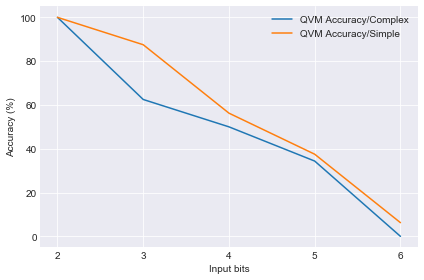

In [132]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_accuracy_c, label='QVM Accuracy/Complex')
plt.plot(x, qvm_accuracy_s, label='QVM Accuracy/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('grover_qvm_acc')
plt.show()

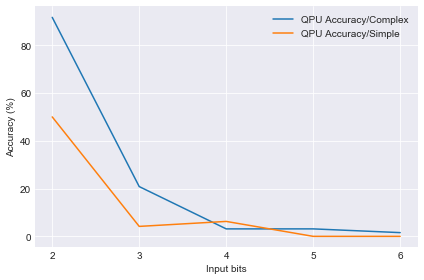

In [133]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qpu_accuracy_c, label='QPU Accuracy/Complex')
plt.plot(x, qpu_accuracy_s, label='QPU Accuracy/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('grover_qpu_acc')
plt.show()

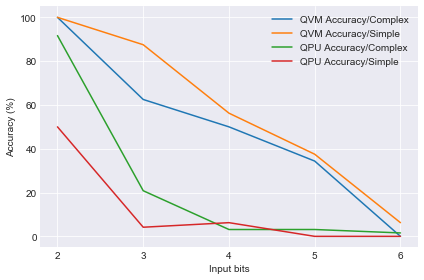

In [134]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_accuracy_c, label='QVM Accuracy/Complex')
plt.plot(x, qvm_accuracy_s, label='QVM Accuracy/Simple')
plt.plot(x, qpu_accuracy_c, label='QPU Accuracy/Complex')
plt.plot(x, qpu_accuracy_s, label='QPU Accuracy/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.savefig('grover_both_acc')
plt.show()

### Losses

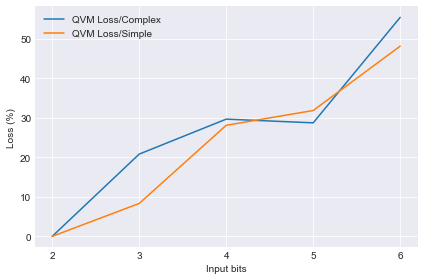

In [135]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_loss_c, label='QVM Loss/Complex')
plt.plot(x, qvm_loss_s, label='QVM Loss/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Loss (%)')
plt.tight_layout()
plt.savefig('grover_qvm_loss')
plt.show()

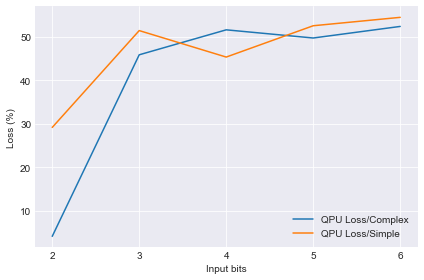

In [136]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qpu_loss_c, label='QPU Loss/Complex')
plt.plot(x, qpu_loss_s, label='QPU Loss/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Loss (%)')
plt.tight_layout()
plt.savefig('grover_qpu_loss')
plt.show()

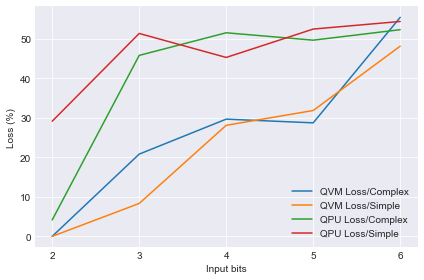

In [137]:
x = list(range(2, 7))

plt.style.use('seaborn-darkgrid')
plt.figure()
plt.plot(x, qvm_loss_c, label='QVM Loss/Complex')
plt.plot(x, qvm_loss_s, label='QVM Loss/Simple')
plt.plot(x, qpu_loss_c, label='QPU Loss/Complex')
plt.plot(x, qpu_loss_s, label='QPU Loss/Simple')
plt.legend()
plt.xticks(x)
plt.xlabel('Input bits')
plt.ylabel('Loss (%)')
plt.tight_layout()
plt.savefig('grover_both_loss')
plt.show()